In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
import allantools

import gm2
import trfp
import analysis_helper as helper

import plotting_functions as plt2

from IPython.display import clear_output

In [4]:
interp_df = pd.read_hdf('hdf5/super-long_stationary_run.h5', 'interp_df')
moment_df = helper.calc_moment_df(interp_df)


Finished calculating all moments for 252363 events.  


In [6]:
Ns = [0,1,1,2,2,3,3,4,4,5,5,6,6,7,7,8,8];
ss = [0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1];

def multipole(N,s,A,x,y):
    r = np.sqrt(x**2+y**2)
    theta = np.arctan2(y,x)
    if(s==0):
        By = 61.79e6 + A * (r/4.5)**N * np.cos(N*theta)
        Bx = A * (r/4.5)**N * np.sin(N*theta)
    if(s==1):
        By = 61.79e6 + A * (r/4.5)**N * np.sin(N*theta)
        Bx = -A * (r/4.5)**N * np.cos(N*theta)
    B = np.sqrt(Bx**2 + By**2) - 61.79e6
    return B

In [9]:
ms = np.empty((6, 17))
for i in range(17):
    Bs = multipole(Ns[i], ss[i], 1, trfp.FP6_X, trfp.FP6_Y)
    ms[:,i] = np.matmul(trfp.THETA_FP_6, Bs)
    

In [45]:
print np.round(ms[4,:], 3)

[   0.       0.       0.      -0.       1.      -0.       0.     -17.123
   -0.      -0.       0.     109.267   -0.       0.       0.    -452.196
    0.   ]


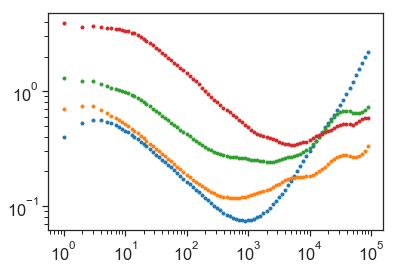

In [42]:
taus_in = np.round(np.power(10, np.arange(0,5,0.05)))

diff = moment_df['st22,m1'].values - moment_df['tr,m1'].values
taus, adev, _, _ = allantools.oadev(diff, data_type='freq', rate=1, taus=taus_in)
plt.loglog(taus, adev, '.')

diff = diff - -2.632*moment_df['tr,m5'].values
taus, adev, _, _ = allantools.oadev(diff, data_type='freq', rate=1, taus=taus_in)
plt.loglog(taus, adev, '.')

diff = diff - 3.499*moment_df['tr,m8'].values
taus, adev, _, _ = allantools.oadev(diff, data_type='freq', rate=1, taus=taus_in)
plt.loglog(taus, adev, '.')

diff = diff - 7.276*moment_df['tr,m12'].values
taus, adev, _, _ = allantools.oadev(diff, data_type='freq', rate=1, taus=taus_in)
plt.loglog(taus, adev, '.')


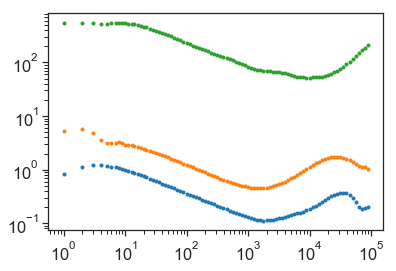

In [44]:
taus_in = np.round(np.power(10, np.arange(0,5,0.05)))

diff = moment_df['st22,m2'].values - moment_df['tr,m2'].values
taus, adev, _, _ = allantools.oadev(diff, data_type='freq', rate=1, taus=taus_in)
plt.loglog(taus, adev, '.')

diff = diff - -8.339*moment_df['tr,m6'].values
taus, adev, _, _ = allantools.oadev(diff, data_type='freq', rate=1, taus=taus_in)
plt.loglog(taus, adev, '.')

diff = diff - 30.048*moment_df['tr,m10'].values
taus, adev, _, _ = allantools.oadev(diff, data_type='freq', rate=1, taus=taus_in)
plt.loglog(taus, adev, '.')

# diff = diff - 7.276*moment_df['tr,m12'].values
# taus, adev, _, _ = allantools.oadev(diff, data_type='freq', rate=1, taus=taus_in)
# plt.loglog(taus, adev, '.')
